In [31]:
import pandas as pd

# importing all sheets from the two files to two dictionaries (with sheet names as keys)

# cases data source:
# https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/statistik-och-analyser/bekraftade-fall-i-sverige/
cases_sheets = pd.read_excel("../../Data/Lab-Data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name=None)

# vaccination data source:
# https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/statistik-och-analyser/statistik-over-registrerade-vaccinationer-covid-19/
vac_sheets = pd.read_excel("../../Data/Lab-Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name=None)

# Uppgift 1

In [32]:
df_weeks = cases_sheets["Veckodata Riket"]
df_weeks.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


## a) Initial data analysis

In [33]:
df_weeks.shape, df_weeks.columns, df_weeks.index

((142, 13),
 Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
        'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
        'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
        'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
        'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
       dtype='object'),
 RangeIndex(start=0, stop=142, step=1))

In [34]:
df_weeks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

In [35]:
df_weeks.describe()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2020.957746,26.035211,18378.345070,177.197183,354.169014,1.125288e+06,10843.281690,67.176056,6000.464789,144.936620,14.000000,12321.154930,1187.840841
std,0.797809,14.228835,38569.455753,371.689114,725.677174,9.618084e+05,9265.100705,73.435000,3076.853993,173.659331,16.796551,6103.235009,587.255605
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,3075.000000,30.000000,59.750000,1.014860e+05,982.500000,14.000000,2643.750000,25.250000,2.425000,5880.000000,569.375000
50%,2021.000000,26.000000,5531.000000,53.000000,107.500000,1.085848e+06,10461.500000,27.500000,7559.500000,77.500000,7.450000,14610.500000,1407.650024
75%,2022.000000,37.750000,21125.000000,203.500000,421.250000,2.423603e+06,23350.500000,109.000000,8863.250000,185.500000,17.950000,17177.750000,1654.999969
max,2022.000000,53.000000,265043.000000,2554.000000,5024.000000,2.609725e+06,25144.000000,289.000000,9539.000000,664.000000,64.300003,20581.000000,1982.900024


In [36]:
df_weeks.value_counts()

år    veckonummer  Antal_fall_vecka  Antal_fall_100000inv_vecka  Antal_fall_100000inv_14dagar  Kum_antal_fall  Kum_fall_100000inv  Antal_nyaintensivvårdade_vecka  Kum_antal_intensivvårdade  Antal_avlidna_vecka  Antal_avlidna_milj_inv_vecka  Kum_antal_avlidna  Kum_antal_avlidna_milj_inv
2020  6            1                 0                           0                             1               0                   0                               0                          0                    0.000000                      0                  0.000000                      1
2021  50           24485             236                         416                           1260348         12143               66                              8152                       49                   4.700000                      15259              1470.099976                   1
      44           5060              49                          106                           1178586         11355             

## b) 'Week' column

In [37]:
df_weeks["Vecka"] = df_weeks["år"].astype(str) + "v" + df_weeks["veckonummer"].astype(str)

In [38]:
df_weeks.columns

Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv', 'Vecka'],
      dtype='object')

## c-f) Plots

### Seaborn plots

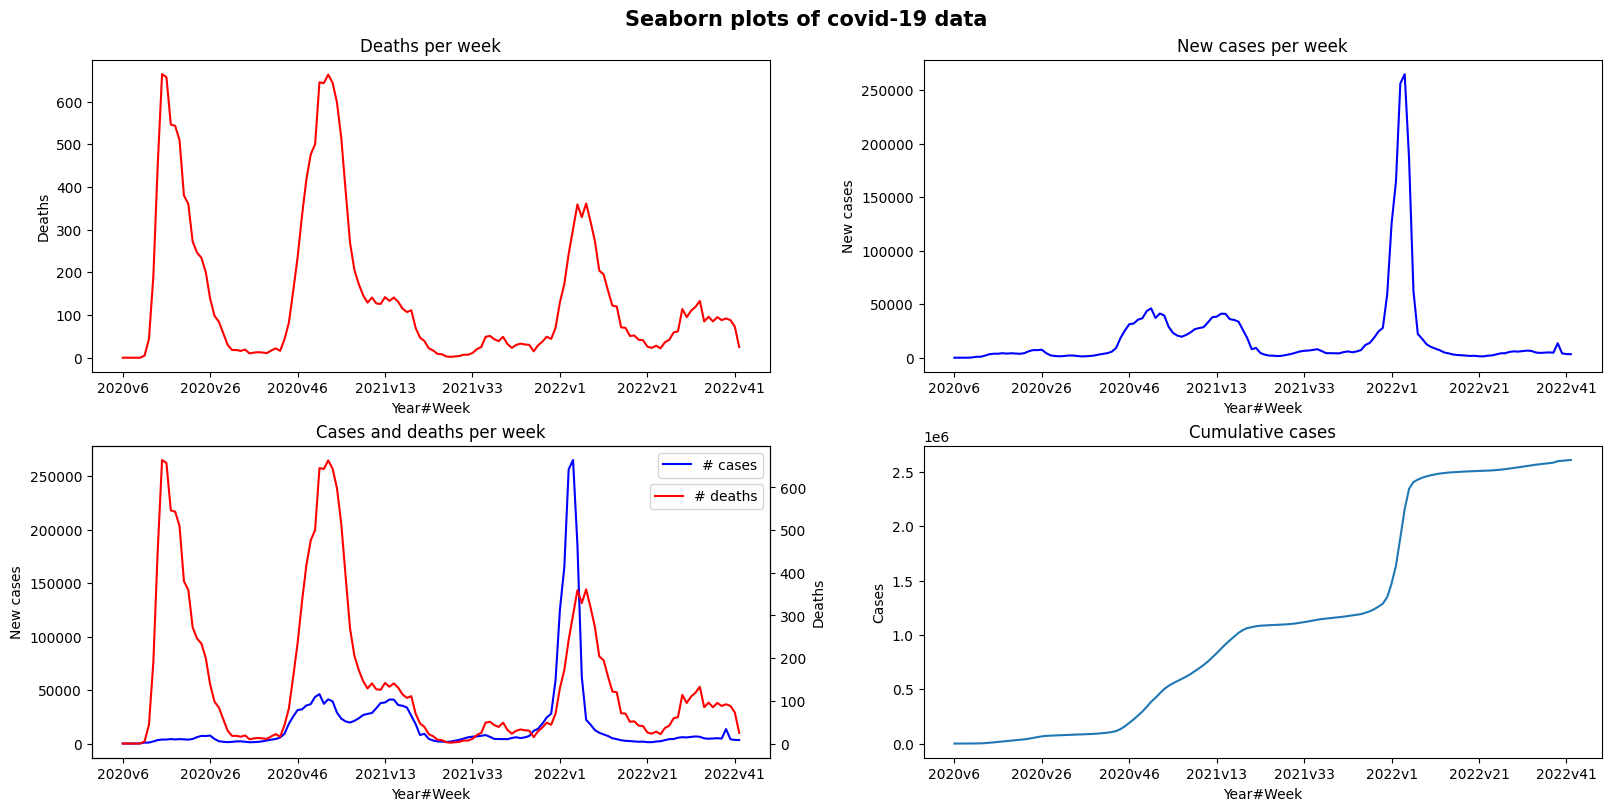

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2,2, figsize = (16, 8), constrained_layout=True)

# the basic plots
sns.lineplot(data=df_weeks, x = "Vecka", y = "Antal_avlidna_vecka", color= "red", ax=ax[0,0])
sns.lineplot(data=df_weeks, x = "Vecka", y = "Antal_fall_vecka", color = "blue", ax=ax[0,1])
sns.lineplot(data=df_weeks, x = "Vecka", y = "Kum_antal_fall", ax=ax[1,1])

# plotting both cases and deaths in one seaborn plot, with separate y axis ranges
sns.lineplot(data=df_weeks, x = "Vecka", y = "Antal_fall_vecka", color = "blue", ax=ax[1,0])
ax2 = ax[1,0].twinx() # create a twin y axis (sharing the x axis)
sns.lineplot(data=df_weeks, x = "Vecka", y = "Antal_avlidna_vecka", color = "red", ax=ax2)
ax2.set(ylabel="Deaths")
ax[1,0].legend(labels=["# cases"])
ax2.legend(labels=["# deaths"], bbox_to_anchor=(1,0.9))

# set labels
titles = ["Deaths per week", "New cases per week", "Cases and deaths per week", "Cumulative cases"]
labels = ["Deaths", "New cases", "New cases", "Cases"]

for axi, title, label in zip(ax.ravel(), titles, labels): # ravel() method flattens ax
    axi.set(title = title, ylabel = label, xlabel = "Year#Week")
    axi.xaxis.set_major_locator(plt.MaxNLocator(10)) # source Discord #databehandling (Kokchun, 01/11/2022)

fig.suptitle("Seaborn plots of covid-19 data", fontsize=15, fontweight="bold")

plt.savefig("../../Data/test.png", facecolor = "white", bbox_inches = "tight")

### Plotly express plots

In [165]:
import plotly_express as px

fig1 = px.line(df_weeks, x = "Vecka", y = "Antal_avlidna_vecka")
fig2 = px.line(df_weeks, x = "Vecka", y = "Antal_fall_vecka")
fig3 = px.line(df_weeks, x = "Vecka", y = ["Antal_avlidna_vecka", "Antal_fall_vecka"], log_y = True) # made log scale, so no second y axis needed
fig4 = px.line(df_weeks, x = "Vecka", y = "Kum_antal_fall")

fig.show()
fig1.show()
fig3.show()
fig4.show()
